# Condition Analysis (Mutation Up)

In this notebook we're analyzing the *mutation up* condition. We will compare changes in the genome size, changes in the structure (number of coding vs. non-coding bases, etc.), the fitness, evolvability, and robustness.

## Read in the data and set up environment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#INPUT_ROOT_DIR = "C://ThesisData//" # laptop
INPUT_ROOT_DIR = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//" # Desktop
OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//"
WINDOW_SIZE = 10000 # Size of the rolling window for smoothing
plt.ioff() # Do not show the plot every time

print("Reading in the data...")

# stat_fitness_best.out 
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
df_seed01_control_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed01_mutation_up_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out",skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

df_seed02_control_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names) 
df_seed02_mutation_up_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

df_seed03_control_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed03_mutation_up_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

df_seed04_control_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed04_mutation_up_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

df_seed05_control_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed05_mutation_up_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

# stat_bp_best.out
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
df_seed01_control_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_seed01_mutation_up_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)

df_seed02_control_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_seed02_mutation_up_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)

df_seed03_control_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_seed03_mutation_up_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)

df_seed04_control_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_seed04_mutation_up_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)

df_seed05_control_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out", skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)
df_seed05_mutation_up_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)


# TO DELETE
df_seed02_super_high_mutation_fitness_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//seed02_super_high_mutation//stats//stat_fitness_best.out", skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed02_super_high_mutation_bp_best = pd.read_csv(INPUT_ROOT_DIR + "seed02//seed02_super_high_mutation//stats//stat_bp_best.out",skiprows=17, delim_whitespace=True, header=0, names=bp_best_names)


print("Done.")


Reading in the data...
Done.


## Parameter Values
Before we begin graphing, here are the relevant parameter values used for each condition:

##### Control
*INIT_POP_SIZE* - 1024

*POINT_MUTATION_RATE* - 1e-7\
*SMALL_INSERTION_RATE* - 1e-7\
*SMALL_DELETION_RATE* - 1e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   1000

##### Mutation Up
*INIT_POP_SIZE* - 1024

*POINT_MUTATION_RATE* - 4e-7\
*SMALL_INSERTION_RATE* - 4e-7\
*SMALL_DELETION_RATE* - 4e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   1000

##### Mutation Down
*INIT_POP_SIZE* - 1024

*POINT_MUTATION_RATE* - 2.5e-8\
*SMALL_INSERTION_RATE* - 2.5e-8\
*SMALL_DELETION_RATE* - 2.5e-8\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   1000

##### Population Up
*INIT_POP_SIZE* - 4096

*POINT_MUTATION_RATE* - 1e-7\
*SMALL_INSERTION_RATE* - 1e-7\
*SMALL_DELETION_RATE* - 1e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   1000

##### Population Down
*INIT_POP_SIZE* - 256

*POINT_MUTATION_RATE* - 1e-7\
*SMALL_INSERTION_RATE* - 1e-7\
*SMALL_DELETION_RATE* - 1e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   1000

##### Selection Up
*INIT_POP_SIZE* - 1024

*POINT_MUTATION_RATE* - 1e-7\
*SMALL_INSERTION_RATE* - 1e-7\
*SMALL_DELETION_RATE* - 1e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   4000

##### Selection Down
*INIT_POP_SIZE* - 1024

*POINT_MUTATION_RATE* - 1e-7\
*SMALL_INSERTION_RATE* - 1e-7\
*SMALL_DELETION_RATE* - 1e-7\
*MAX_INDEL_SIZE* - 6

*SELECTION_SCHEME* - fitness_proportionate   250

## Genome Size

We will compare the genome size of the **mutation up** condition to the **control** condition by graphing their genome sizes over time. We will plot the control condition vs mutation up for all five seeds.

#### Plot the conditions

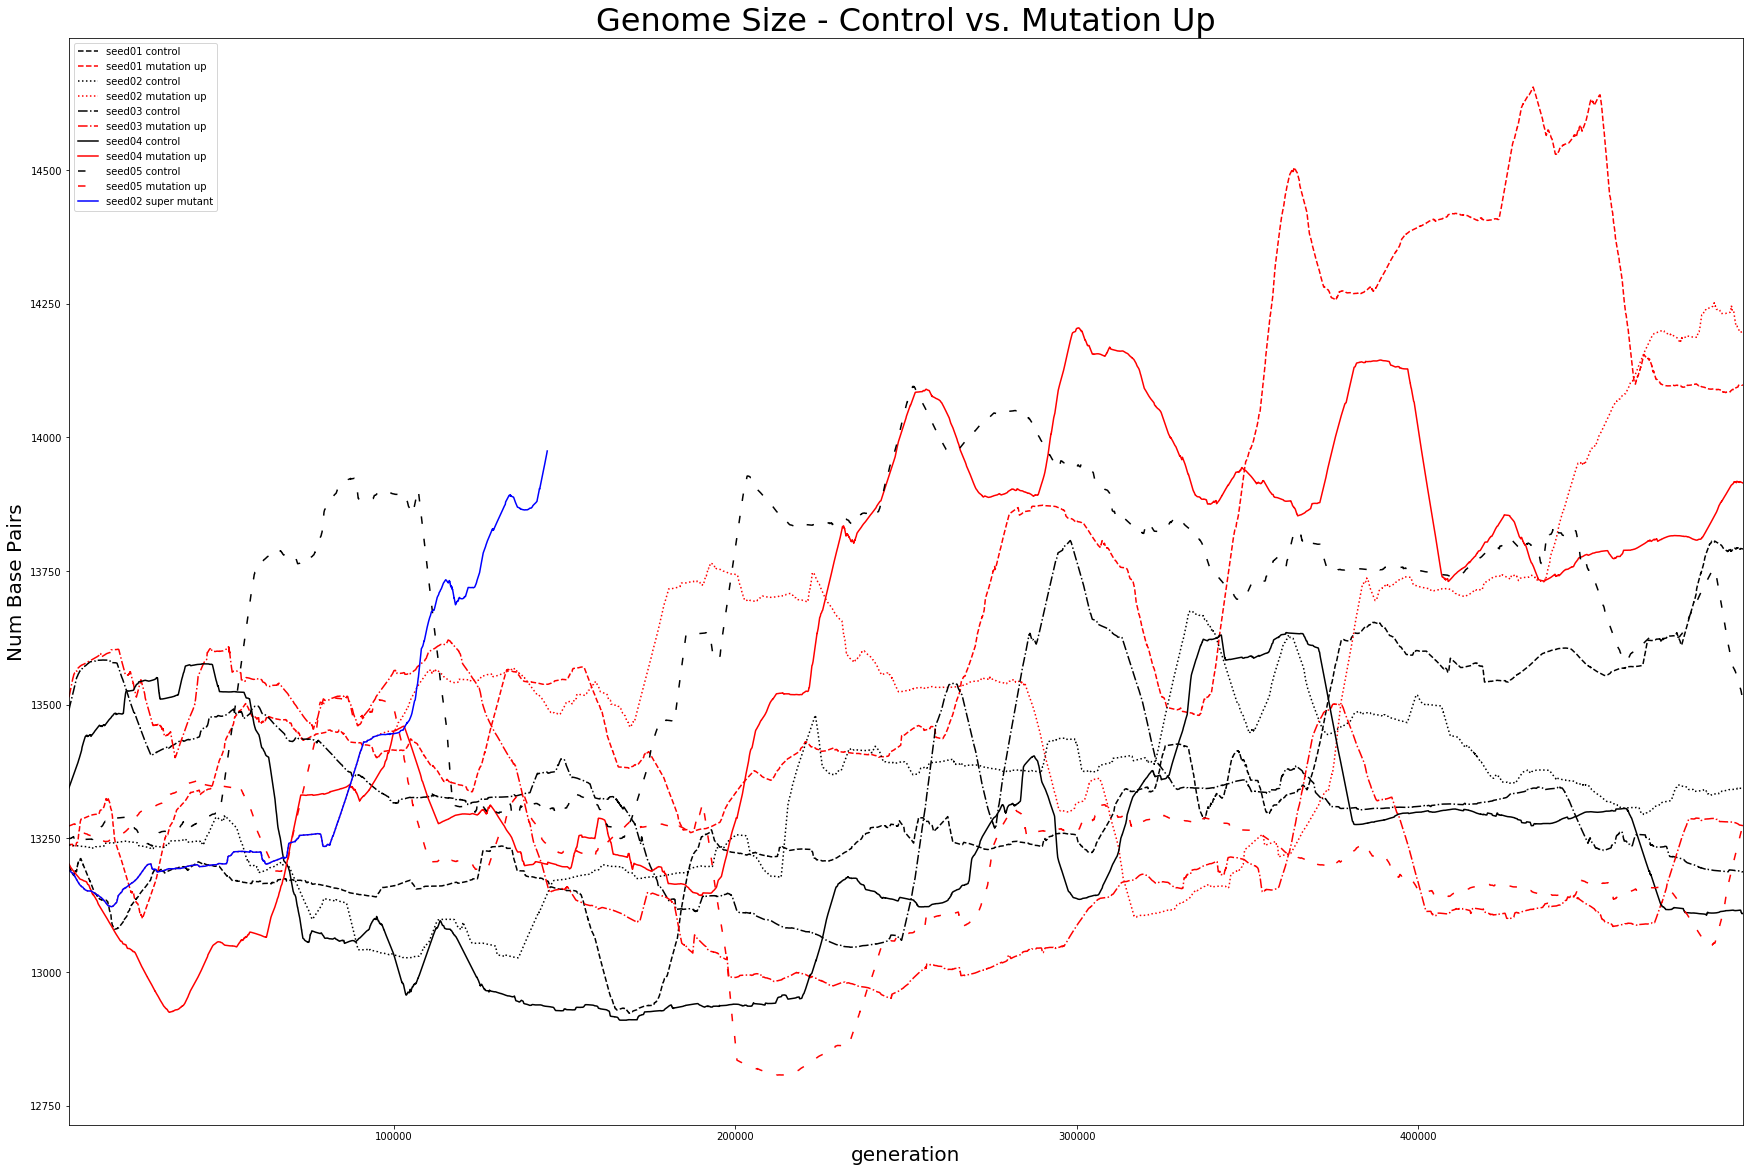

In [2]:
# Create new figure
fig_genome_size_best = plt.figure(figsize=(30,20))
ax_genome_size_best = fig_genome_size_best.add_subplot(111)
ax_genome_size_best.set_title("Genome Size - Control vs. Mutation Up", fontsize=32)
ax_genome_size_best.set_xlabel("Generation", fontsize=20)
ax_genome_size_best.set_ylabel("Num Base Pairs", fontsize=20)

# Plot the results to the figure. For each plot, smooth plot by using rolling window
# of average of $WINDOW_SIZE points, rather than all data points

# Seed 1
df_tmp1 = df_seed01_control_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp1.plot(x='generation', y='genome_size', linestyle='dashed', color=(0.0,0.0,0.0), label='seed01 control', ax=ax_genome_size_best)

df_tmp2 = df_seed01_mutation_up_fitness_best[['generation','genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp2.plot(x='generation', y='genome_size',linestyle='dashed', color=(1.0,0.0,0.0), label='seed01 mutation up', ax=ax_genome_size_best)

# Seed 2
df_tmp3 = df_seed02_control_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp3.plot(x='generation', y='genome_size', linestyle='dotted', color=(0.0,0.0,0.0), label='seed02 control', ax=ax_genome_size_best)

df_tmp4 = df_seed02_mutation_up_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp4.plot(x='generation', y='genome_size', linestyle='dotted', color=(1.0,0.0,0.0), label='seed02 mutation up', ax=ax_genome_size_best)

# Seed 3
df_tmp5 = df_seed03_control_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp5.plot(x='generation', y='genome_size', linestyle='dashdot', color=(0.0,0.0,0.0), label='seed03 control', ax=ax_genome_size_best)

df_tmp6 = df_seed03_mutation_up_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp6.plot(x='generation', y='genome_size', linestyle='dashdot', color=(1.0,0.0,0.0), label='seed03 mutation up', ax=ax_genome_size_best)

# Seed 4
df_tmp7 = df_seed04_control_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp7.plot(x='generation', y='genome_size', color=(0.0,0.0,0.0), label='seed04 control', ax=ax_genome_size_best)

df_tmp8 = df_seed04_mutation_up_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp8.plot(x='generation', y='genome_size', color=(1.0,0.0,0.0), label='seed04 mutation up', ax=ax_genome_size_best)

# Seed 5
df_tmp9 = df_seed05_control_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp9.plot(x='generation', y='genome_size', linestyle=(0,(5,10)), color=(0.0,0.0,0.0), label='seed05 control', ax=ax_genome_size_best)

df_tmp10 = df_seed05_mutation_up_fitness_best[['generation', 'genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp10.plot(x='generation', y='genome_size', linestyle=(0,(5,10)), color=(1.0,0.0,0.0), label='seed05 mutation up', ax=ax_genome_size_best)

# TO DELETE
df_tmp11 = df_seed02_super_high_mutation_fitness_best[['generation','genome_size']].copy().rolling(WINDOW_SIZE).mean()
df_tmp11.plot(x='generation', y='genome_size', color=(0.0,0.0,1.0), label="seed02 super mutant", ax=ax_genome_size_best)

# Save and close the figure
fig_genome_size_best.savefig(OUTPUT_ROOT_DIR + "genome_size-control_vs_mutation_up.png")
plt.show()
plt.close(fig_genome_size_best)

# Delete unnecessary DataFrames
del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10

#### Analysis

This graph shows the genome size of the best organism at each generation over the course of the entire run. 

In "*A Long-Term Evolutionary Pressure on the Amount of Noncoding DNA*", it is stated that an increased mutation rate leads to a more compact genome. 

In our experiments however, this pattern does not seem to hold. In all seeds except for seed05, the *mutation up* condition had a **larger** genome than the *control* condition.  



## Number of Genes

#### Read in the data

In [3]:
print("Reading in data...")
genes_best_names = ['generation', 'num_coding_RNAs', 'num_non-coding_RNAs', 'avg_size_of_coding_RNAs', 'avg_size_of_non-coding_RNAs', 'num_functional_genes', 'num_non-functional_genes', 'avg_size_of_functional_genes', 'avg_size_of_non-functional_genes']
df_seed01_control_genes_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_best.out", skiprows=14, delim_whitespace=True,header=0, names=genes_best_names)
df_seed01_mutation_up_best = pd.read_csv(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_best.out", skiprows=14, delim_whitespace=True,header=0, names=genes_best_names)

print("Done.")

Reading in data...
Done.


#### Graph results

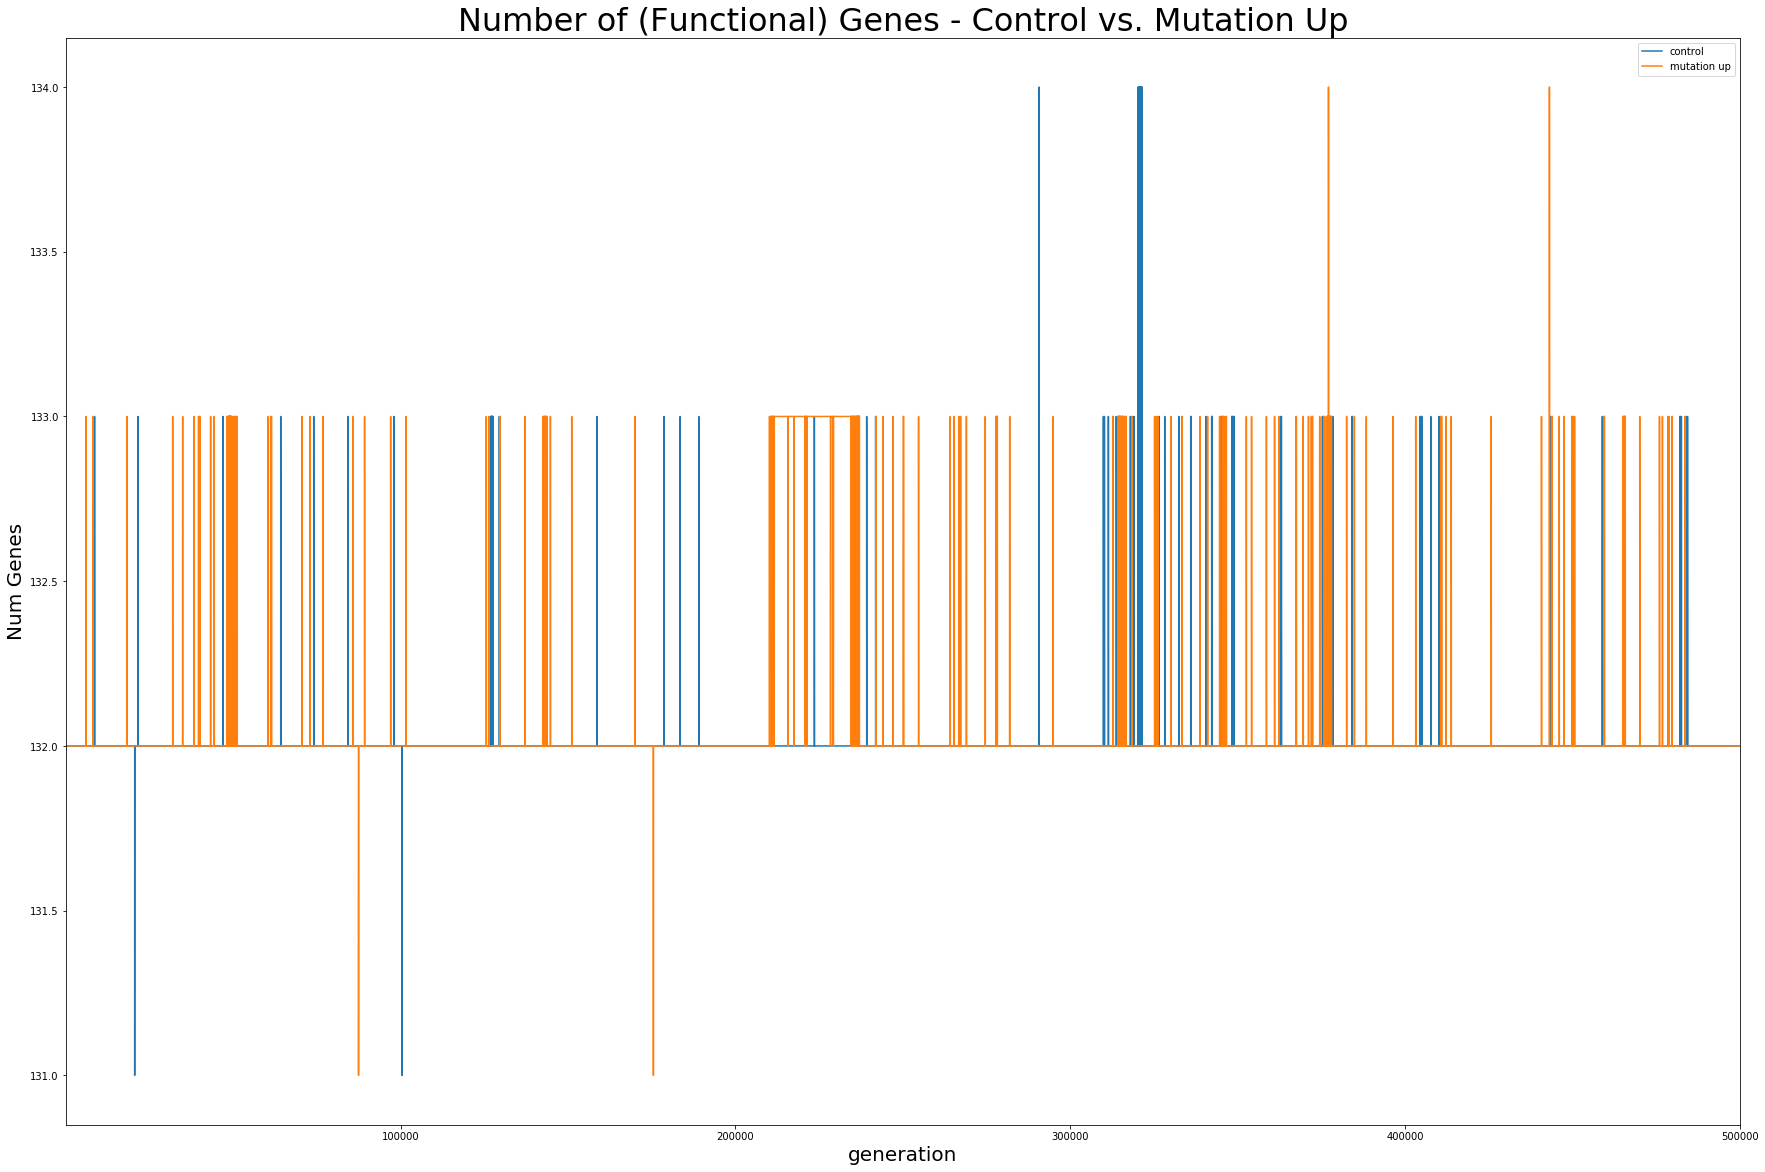

In [4]:
fig_num_genes_best = plt.figure(figsize=(30,20))
ax_num_genes_best = fig_num_genes_best.add_subplot(111)
ax_num_genes_best.set_title("Number of (Functional) Genes - Control vs. Mutation Up", fontsize=32)
ax_num_genes_best.set_xlabel("Generation", fontsize=20)
ax_num_genes_best.set_ylabel("Num Genes", fontsize=20)

df_seed01_control_genes_best.plot(x='generation', y='num_functional_genes', label='control', ax=ax_num_genes_best)
df_seed01_mutation_up_best.plot(x='generation', y='num_functional_genes', label='mutation up', ax=ax_num_genes_best)

fig_num_genes_best.savefig(OUTPUT_ROOT_DIR + "num_genes-control-vs-mutation_up.png")
plt.show()
plt.close(fig_num_genes_best)

##### Analysis

In " *A Long-Term Evolutionary Pressure on the Amount of Noncoding DNA* "it is also stated that "as most mutations are deleterious, the per-base pair mutation rate can impose an upper limit to the number of genes. The higher the mutation rate, the lower the number of genes at equilibrium." 

## Number of Coding Bases

#### Plot the data

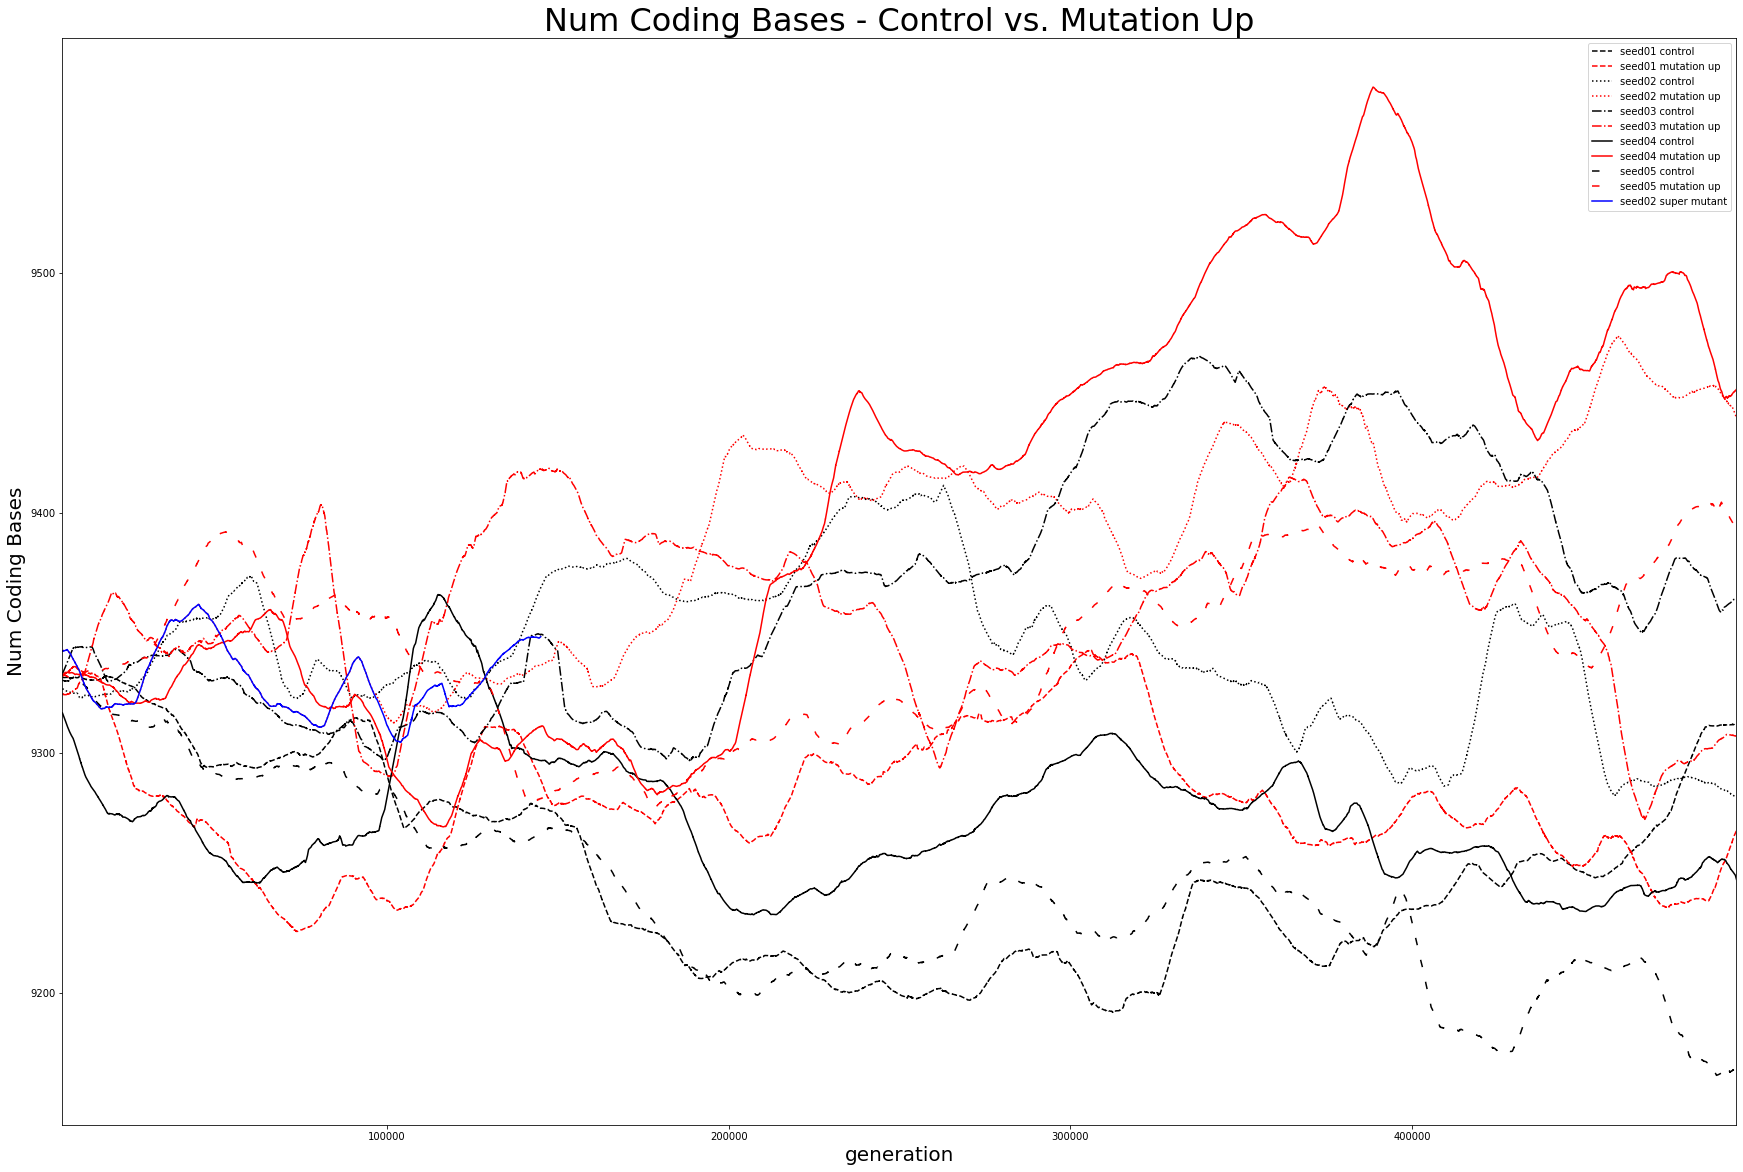

In [5]:
# Create new figure
fig_num_coding_bases_best = plt.figure(figsize=(30,20))
ax_num_coding_bases_best = fig_num_coding_bases_best.add_subplot(111)
ax_num_coding_bases_best.set_title("Num Coding Bases - Control vs. Mutation Up", fontsize=32)
ax_num_coding_bases_best.set_xlabel("Generation", fontsize=20)
ax_num_coding_bases_best.set_ylabel("Num Coding Bases", fontsize=20)

# Plot the data to the figure. For each seed, we need to calculate the number of coding bases. Aevol
# gives us the number of noncoding bases, so we need to subtract this from the total genome size to get
# the number of coding bases. Then we can plot this, smoothing the plot by using a rolling window
# of the average of $WINDOW_SIZE points, rather than all data points

# Seed01
# 1) get generation numbers 2) calculate number of coding bases 3) smooth the graph
df_tmp1 = df_seed01_control_fitness_best[['generation']].copy()
df_tmp1['num_coding_bases'] = df_seed01_control_fitness_best['genome_size'] - df_seed01_control_bp_best['num_of_non-essential_bp']
df_tmp1 = df_tmp1[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the control
df_tmp1.plot(x='generation', y='num_coding_bases', linestyle='dashed', color=(0.0,0.0,0.0), label='seed01 control', ax=ax_num_coding_bases_best)


df_tmp2 = df_seed01_mutation_up_fitness_best[['generation']].copy()
df_tmp2['num_coding_bases'] = df_seed01_mutation_up_fitness_best['genome_size'] - df_seed01_mutation_up_bp_best['num_of_non-essential_bp']
df_tmp2 = df_tmp2[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the mutation up condition
df_tmp2.plot(x='generation', y='num_coding_bases', linestyle='dashed', color=(1.0, 0.0, 0.0), label='seed01 mutation up', ax=ax_num_coding_bases_best)


# Seed02
# 1) get generation numbers 2) calculate number of coding bases 3) smooth the graph
df_tmp3 = df_seed02_control_fitness_best[['generation']].copy()
df_tmp3['num_coding_bases'] = df_seed02_control_fitness_best['genome_size'] - df_seed02_control_bp_best['num_of_non-essential_bp']
df_tmp3 = df_tmp3[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the control
df_tmp3.plot(x='generation', y='num_coding_bases', linestyle='dotted', color=(0.0,0.0,0.0), label='seed02 control', ax=ax_num_coding_bases_best)


df_tmp4 = df_seed02_mutation_up_fitness_best[['generation']].copy()
df_tmp4['num_coding_bases'] = df_seed02_mutation_up_fitness_best['genome_size'] - df_seed02_mutation_up_bp_best['num_of_non-essential_bp']
df_tmp4 = df_tmp4[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the mutation up condition
df_tmp4.plot(x='generation', y='num_coding_bases', linestyle='dotted', color=(1.0, 0.0, 0.0), label='seed02 mutation up', ax=ax_num_coding_bases_best)



# Seed03
# 1) get generation numbers 2) calculate number of coding bases 3) smooth the graph
df_tmp5 = df_seed03_control_fitness_best[['generation']].copy()
df_tmp5['num_coding_bases'] = df_seed03_control_fitness_best['genome_size'] - df_seed03_control_bp_best['num_of_non-essential_bp']
df_tmp5 = df_tmp5[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the control
df_tmp5.plot(x='generation', y='num_coding_bases', linestyle='dashdot', color=(0.0,0.0,0.0), label='seed03 control', ax=ax_num_coding_bases_best)


df_tmp6 = df_seed03_mutation_up_fitness_best[['generation']].copy()
df_tmp6['num_coding_bases'] = df_seed03_mutation_up_fitness_best['genome_size'] - df_seed03_mutation_up_bp_best['num_of_non-essential_bp']
df_tmp6 = df_tmp6[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the mutation up condition
df_tmp6.plot(x='generation', y='num_coding_bases', linestyle='dashdot', color=(1.0, 0.0, 0.0), label='seed03 mutation up', ax=ax_num_coding_bases_best)



# Seed04
# 1) get generation numbers 2) calculate number of coding bases 3) smooth the graph
df_tmp7 = df_seed04_control_fitness_best[['generation']].copy()
df_tmp7['num_coding_bases'] = df_seed04_control_fitness_best['genome_size'] - df_seed04_control_bp_best['num_of_non-essential_bp']
df_tmp7 = df_tmp7[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the control
df_tmp7.plot(x='generation', y='num_coding_bases', color=(0.0,0.0,0.0), label='seed04 control', ax=ax_num_coding_bases_best)


df_tmp8 = df_seed04_mutation_up_fitness_best[['generation']].copy()
df_tmp8['num_coding_bases'] = df_seed04_mutation_up_fitness_best['genome_size'] - df_seed04_mutation_up_bp_best['num_of_non-essential_bp']
df_tmp8 = df_tmp8[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the mutation up condition
df_tmp8.plot(x='generation', y='num_coding_bases', color=(1.0, 0.0, 0.0), label='seed04 mutation up', ax=ax_num_coding_bases_best)



# Seed05
# 1) get generation numbers 2) calculate number of coding bases 3) smooth the graph
df_tmp9 = df_seed05_control_fitness_best[['generation']].copy()
df_tmp9['num_coding_bases'] = df_seed05_control_fitness_best['genome_size'] - df_seed05_control_bp_best['num_of_non-essential_bp']
df_tmp9 = df_tmp9[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the control
df_tmp9.plot(x='generation', y='num_coding_bases', linestyle=(0,(5,10)), color=(0.0,0.0,0.0), label='seed05 control', ax=ax_num_coding_bases_best)


df_tmp10 = df_seed05_mutation_up_fitness_best[['generation']].copy()
df_tmp10['num_coding_bases'] = df_seed05_mutation_up_fitness_best['genome_size'] - df_seed05_mutation_up_bp_best['num_of_non-essential_bp']
df_tmp10 = df_tmp10[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

# Plot the mutation up condition
df_tmp10.plot(x='generation', y='num_coding_bases', linestyle=(0,(5,10)), color=(1.0, 0.0, 0.0), label='seed05 mutation up', ax=ax_num_coding_bases_best)


# TO DELETE
df_tmp11 = df_seed02_super_high_mutation_fitness_best[['generation']].copy()
df_tmp11['num_coding_bases'] = df_seed02_super_high_mutation_fitness_best['genome_size'] - df_seed02_super_high_mutation_bp_best['num_of_non-essential_bp']
df_tmp11 = df_tmp11[['generation', 'num_coding_bases']].copy().rolling(WINDOW_SIZE).mean()

df_tmp11.plot(x='generation', y='num_coding_bases', color=(0.0,0.0,1.0), label='seed02 super mutant', ax=ax_num_coding_bases_best)

# Save and close the figure
fig_num_coding_bases_best.savefig(OUTPUT_ROOT_DIR + "num_coding_bases-control_vs_mutation_up.png")
plt.show()
plt.close(fig_num_coding_bases_best)

# Delete unnecessary DataFrames
del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10

#### Analysis

This

## Number of Non-Coding Bases

#### Plot the data

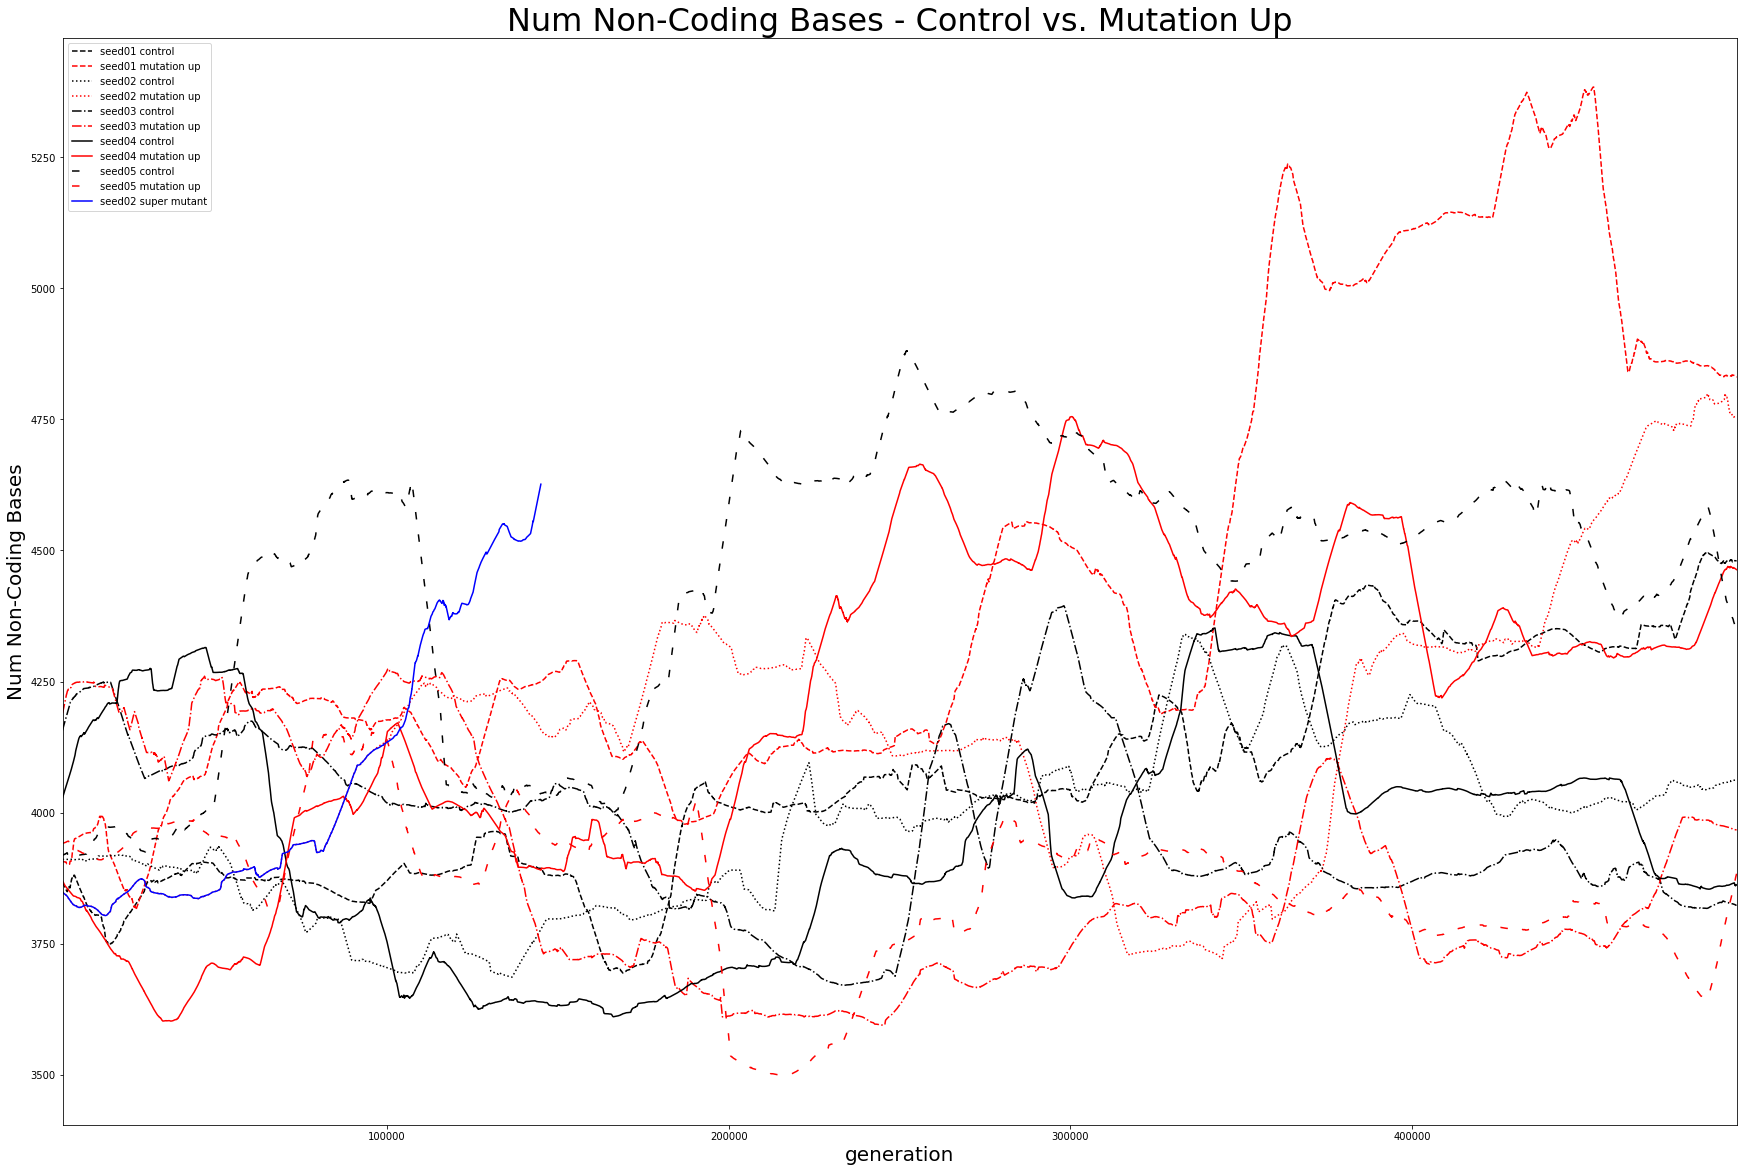

In [6]:
# Create new figure
fig_num_noncoding_bases_best = plt.figure(figsize=(30,20))
ax_num_noncoding_bases_best = fig_num_noncoding_bases_best.add_subplot(111)
ax_num_noncoding_bases_best.set_title("Num Non-Coding Bases - Control vs. Mutation Up", fontsize=32)
ax_num_noncoding_bases_best.set_xlabel("Generation", fontsize=20)
ax_num_noncoding_bases_best.set_ylabel("Num Non-Coding Bases", fontsize=20)


# Seed 01
df_tmp1 = df_seed01_control_fitness_best[['generation']].copy()
df_tmp1['num_of_non-essential_bp'] = df_seed01_control_bp_best['num_of_non-essential_bp'].copy()
df_tmp1 = df_tmp1[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp1.plot(x='generation', y='num_of_non-essential_bp', linestyle='dashed', color=(0.0,0.0,0.0), label='seed01 control', ax=ax_num_noncoding_bases_best)

df_tmp2 = df_seed01_mutation_up_fitness_best[['generation']].copy()
df_tmp2['num_of_non-essential_bp'] = df_seed01_mutation_up_bp_best['num_of_non-essential_bp'].copy()
df_tmp2 = df_tmp2[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp2.plot(x='generation', y='num_of_non-essential_bp', linestyle='dashed', color=(1.0,0.0,0.0), label='seed01 mutation up', ax=ax_num_noncoding_bases_best)


# Seed 02
df_tmp3 = df_seed02_control_fitness_best[['generation']].copy()
df_tmp3['num_of_non-essential_bp'] = df_seed02_control_bp_best['num_of_non-essential_bp'].copy()
df_tmp3 = df_tmp3[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp3.plot(x='generation', y='num_of_non-essential_bp', linestyle='dotted', color=(0.0,0.0,0.0), label='seed02 control', ax=ax_num_noncoding_bases_best)

df_tmp4 = df_seed02_mutation_up_fitness_best[['generation']].copy()
df_tmp4['num_of_non-essential_bp'] = df_seed02_mutation_up_bp_best['num_of_non-essential_bp'].copy()
df_tmp4 = df_tmp4[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp4.plot(x='generation', y='num_of_non-essential_bp', linestyle='dotted', color=(1.0,0.0,0.0), label='seed02 mutation up', ax=ax_num_noncoding_bases_best)



# Seed 03
df_tmp5 = df_seed03_control_fitness_best[['generation']].copy()
df_tmp5['num_of_non-essential_bp'] = df_seed03_control_bp_best['num_of_non-essential_bp'].copy()
df_tmp5 = df_tmp5[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp5.plot(x='generation', y='num_of_non-essential_bp', linestyle='dashdot', color=(0.0,0.0,0.0), label='seed03 control', ax=ax_num_noncoding_bases_best)

df_tmp6 = df_seed03_mutation_up_fitness_best[['generation']].copy()
df_tmp6['num_of_non-essential_bp'] = df_seed03_mutation_up_bp_best['num_of_non-essential_bp'].copy()
df_tmp6 = df_tmp6[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp6.plot(x='generation', y='num_of_non-essential_bp', linestyle='dashdot', color=(1.0,0.0,0.0), label='seed03 mutation up', ax=ax_num_noncoding_bases_best)


# Seed 04
df_tmp7 = df_seed04_control_fitness_best[['generation']].copy()
df_tmp7['num_of_non-essential_bp'] = df_seed04_control_bp_best['num_of_non-essential_bp'].copy()
df_tmp7 = df_tmp7[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp7.plot(x='generation', y='num_of_non-essential_bp', color=(0.0,0.0,0.0), label='seed04 control', ax=ax_num_noncoding_bases_best)

df_tmp8 = df_seed04_mutation_up_fitness_best[['generation']].copy()
df_tmp8['num_of_non-essential_bp'] = df_seed04_mutation_up_bp_best['num_of_non-essential_bp'].copy()
df_tmp8 = df_tmp8[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp8.plot(x='generation', y='num_of_non-essential_bp', color=(1.0,0.0,0.0), label='seed04 mutation up', ax=ax_num_noncoding_bases_best)


# Seed 05
df_tmp9 = df_seed05_control_fitness_best[['generation']].copy()
df_tmp9['num_of_non-essential_bp'] = df_seed05_control_bp_best['num_of_non-essential_bp'].copy()
df_tmp9 = df_tmp9[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp9.plot(x='generation', y='num_of_non-essential_bp', linestyle=(0,(5,10)), color=(0.0,0.0,0.0), label='seed05 control', ax=ax_num_noncoding_bases_best)

df_tmp10 = df_seed05_mutation_up_fitness_best[['generation']].copy()
df_tmp10['num_of_non-essential_bp'] = df_seed05_mutation_up_bp_best['num_of_non-essential_bp'].copy()
df_tmp10 = df_tmp10[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp10.plot(x='generation', y='num_of_non-essential_bp', linestyle=(0,(5,10)), color=(1.0,0.0,0.0), label='seed05 mutation up', ax=ax_num_noncoding_bases_best)

# TO DELETE
df_tmp11 = df_seed02_super_high_mutation_fitness_best[['generation']].copy()
df_tmp11['num_of_non-essential_bp'] = df_seed02_super_high_mutation_bp_best['num_of_non-essential_bp'].copy()
df_tmp11 = df_tmp11[['generation', 'num_of_non-essential_bp']].copy().rolling(WINDOW_SIZE).mean()

df_tmp11.plot(x='generation', y='num_of_non-essential_bp', color=(0.0,0.0,1.0), label='seed02 super mutant', ax=ax_num_noncoding_bases_best)

# Save and close the figure
fig_num_noncoding_bases_best.savefig(OUTPUT_ROOT_DIR + "num_non-coding_bases-control_vs_mutation_up.png")
plt.show()
plt.close(fig_num_noncoding_bases_best)

#### Analysis

## Fitness

Below we graph out the fitness (metabolic error) of the best individual after each generation.

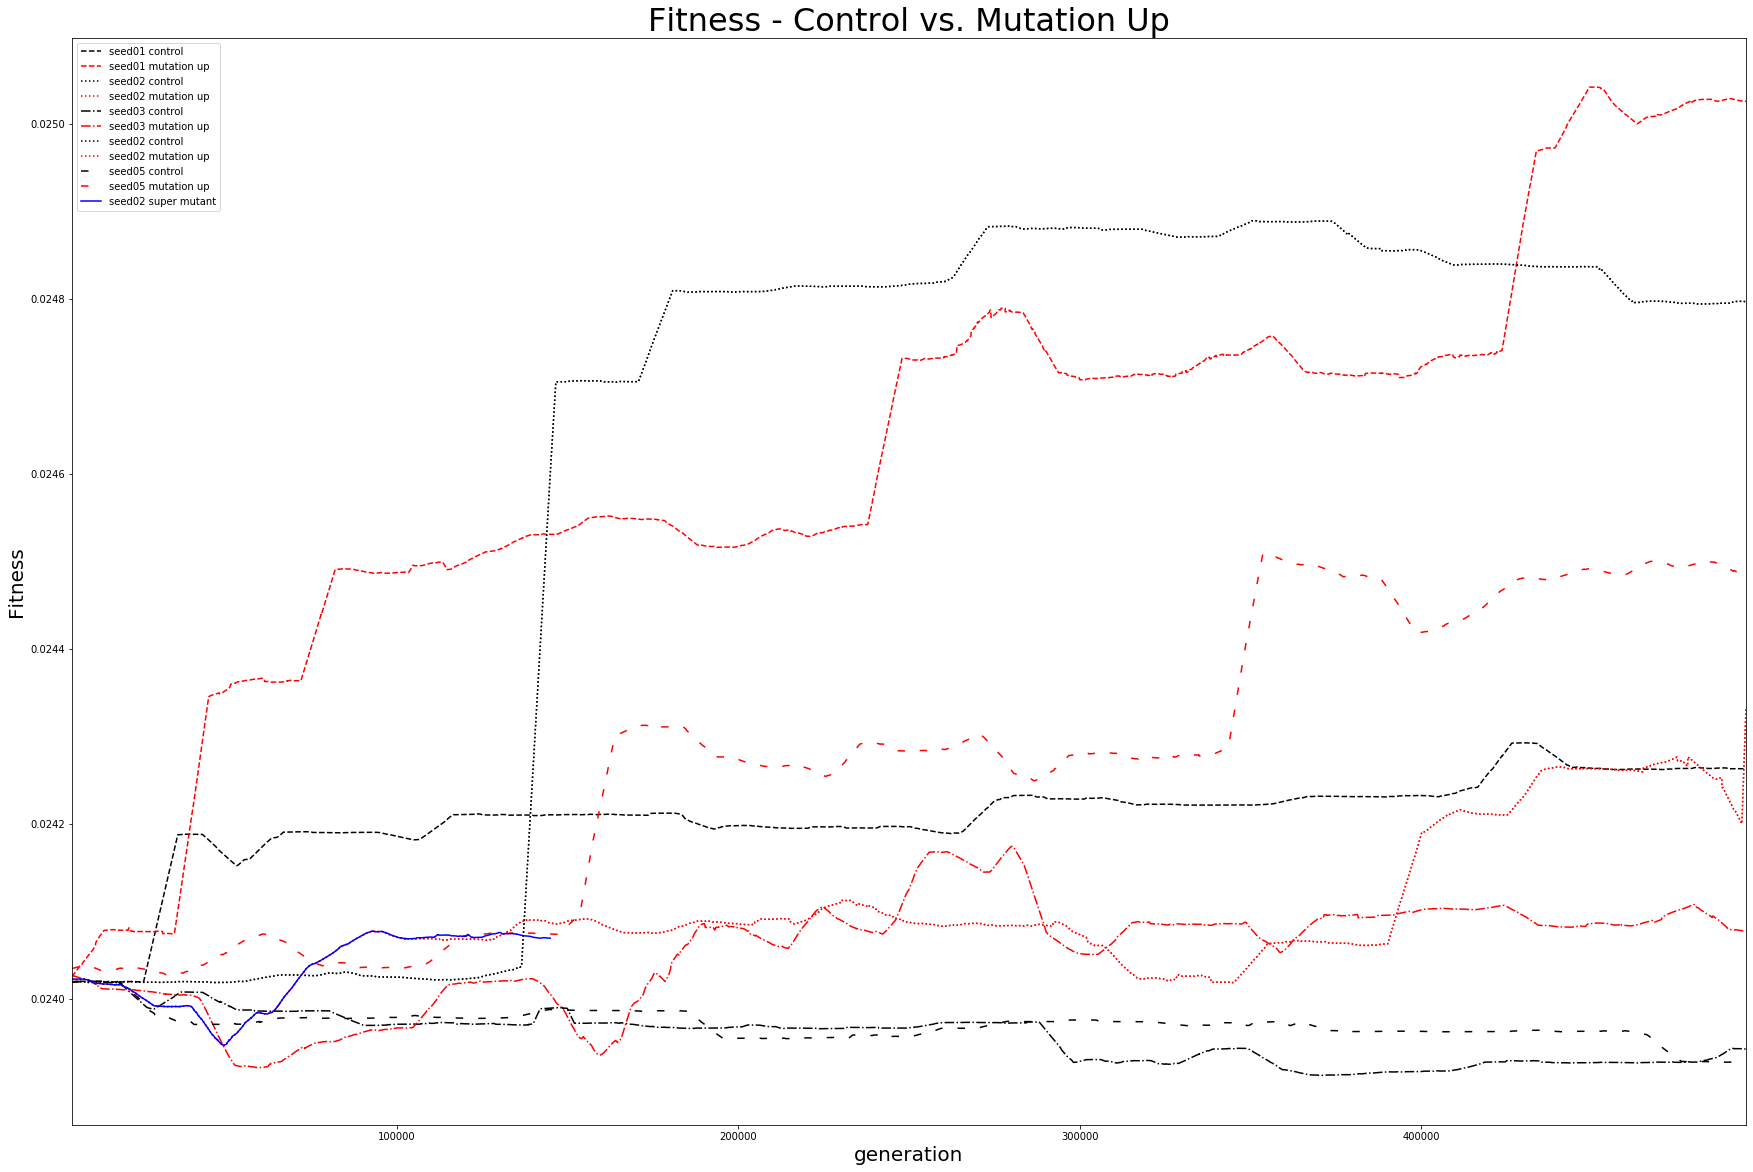

In [7]:
# Create a new figure
fig_fitness_best = plt.figure(figsize=(30,20))
ax_fitness_best = fig_fitness_best.add_subplot(111)
ax_fitness_best.set_title("Fitness - Control vs. Mutation Up", fontsize=32)
ax_fitness_best.set_xlabel("Generation", fontsize=20)
ax_fitness_best.set_ylabel("Fitness", fontsize=20)

# Seed01
df_tmp1 = df_seed01_control_fitness_best[['generation','fitness']].copy()
df_tmp1 = df_tmp1.rolling(WINDOW_SIZE).mean()

df_tmp1.plot(x='generation', y='fitness', linestyle='dashed', color=(0.0,0.0,0.0), label='seed01 control', ax=ax_fitness_best)

df_tmp2 = df_seed01_mutation_up_fitness_best[['generation', 'fitness']].copy()
df_tmp2 = df_tmp2.rolling(WINDOW_SIZE).mean()

df_tmp2.plot(x='generation', y='fitness', linestyle='dashed', color=(1.0,0.0,0.0), label='seed01 mutation up', ax=ax_fitness_best)


# Seed02
df_tmp3 = df_seed02_control_fitness_best[['generation','fitness']].copy()
df_tmp3 = df_tmp3.rolling(WINDOW_SIZE).mean()

df_tmp3.plot(x='generation', y='fitness', linestyle='dotted', color=(0.0,0.0,0.0), label='seed02 control', ax=ax_fitness_best)

df_tmp4 = df_seed02_mutation_up_fitness_best[['generation', 'fitness']].copy()
df_tmp4 = df_tmp4.rolling(WINDOW_SIZE).mean()

df_tmp4.plot(x='generation', y='fitness', linestyle='dotted', color=(1.0,0.0,0.0), label='seed02 mutation up', ax=ax_fitness_best)


# Seed03
df_tmp5 = df_seed03_control_fitness_best[['generation','fitness']].copy()
df_tmp5 = df_tmp5.rolling(WINDOW_SIZE).mean()

df_tmp5.plot(x='generation', y='fitness', linestyle='dashdot', color=(0.0,0.0,0.0), label='seed03 control', ax=ax_fitness_best)

df_tmp6 = df_seed03_mutation_up_fitness_best[['generation', 'fitness']].copy()
df_tmp6 = df_tmp6.rolling(WINDOW_SIZE).mean()

df_tmp6.plot(x='generation', y='fitness', linestyle='dashdot', color=(1.0,0.0,0.0), label='seed03 mutation up', ax=ax_fitness_best)


# Seed04
df_tmp7 = df_seed02_control_fitness_best[['generation','fitness']].copy()
df_tmp7 = df_tmp7.rolling(WINDOW_SIZE).mean()

df_tmp7.plot(x='generation', y='fitness', linestyle='dotted', color=(0.0,0.0,0.0), label='seed02 control', ax=ax_fitness_best)

df_tmp8 = df_seed02_mutation_up_fitness_best[['generation', 'fitness']].copy()
df_tmp8 = df_tmp8.rolling(WINDOW_SIZE).mean()

df_tmp8.plot(x='generation', y='fitness', linestyle='dotted', color=(1.0,0.0,0.0), label='seed02 mutation up', ax=ax_fitness_best)

# Seed05
df_tmp9 = df_seed05_control_fitness_best[['generation','fitness']].copy()
df_tmp9 = df_tmp9.rolling(WINDOW_SIZE).mean()

df_tmp9.plot(x='generation', y='fitness', linestyle=(0,(5,10)), color=(0.0,0.0,0.0), label='seed05 control', ax=ax_fitness_best)

df_tmp10 = df_seed05_mutation_up_fitness_best[['generation', 'fitness']].copy()
df_tmp10 = df_tmp10.rolling(WINDOW_SIZE).mean()

df_tmp10.plot(x='generation', y='fitness', linestyle=(0,(5,10)), color=(1.0,0.0,0.0), label='seed05 mutation up', ax=ax_fitness_best)

# TO DELETE
df_tmp11 = df_seed02_super_high_mutation_fitness_best[['generation', 'fitness']].copy()
df_tmp11 = df_tmp11.rolling(WINDOW_SIZE).mean()

df_tmp11.plot(x='generation', y='fitness', color=(0.0,0.0,1.0), label='seed02 super mutant', ax=ax_fitness_best)

# Save and close the figure
fig_fitness_best.savefig(OUTPUT_ROOT_DIR + "fitness_best-control_vs_mutation_up.png")
plt.show()
plt.close(fig_fitness_best)

#### Analysis

This.

## Evolvability

## Robustness